# Exploration of house data from Arizona state

In [ ]:
# Impport the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## Data input

In [ ]:
# Read the data
data = pd.read_csv('data_project.csv')

In [ ]:
# # Display the few rows of the data
data.head(5)

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,sold_price_per_sqrt_ft,sold_price_per_sqrt_ft_range
0,0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,504.761905,400-599
1,1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,575.342466,400-599
2,3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,498.946668,400-599
3,4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,533.372420,400-599
4,5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422,475.007308,400-599


In [ ]:
# Check the dimensions of the data
data.shape

(4903, 19)

In [ ]:
data['sold_price'].min(), data['sold_price'].max()

(300000.0, 5300000.0)

In [ ]:
# show the concise summary about data and count missing values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    4903 non-null   int64  
 1   MLS                           4903 non-null   int64  
 2   sold_price                    4903 non-null   float64
 3   zipcode                       4903 non-null   int64  
 4   longitude                     4903 non-null   float64
 5   latitude                      4903 non-null   float64
 6   lot_acres                     4903 non-null   float64
 7   taxes                         4903 non-null   float64
 8   year_built                    4903 non-null   int64  
 9   bedrooms                      4903 non-null   int64  
 10  bathrooms                     4903 non-null   float64
 11  sqrt_ft                       4903 non-null   float64
 12  garage                        4903 non-null   float64
 13  kit

In [ ]:
# Descriptive statistical meaures
data.describe()

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,sold_price_per_sqrt_ft
count,4903.000000,4.903000e+03,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2495.650010,2.149141e+07,7.756850e+05,85724.291046,-110.910560,32.315921,4.174536,9.462981e+03,1994.294310,3.927595,3.816337,3707.719274,2.817153,1.879054,212.788707
std,1443.203645,1.336633e+06,3.157269e+05,36.678685,0.120478,0.166568,45.943908,1.746396e+05,17.703888,1.136115,1.301410,1099.038062,1.197187,1.129812,66.632147
min,0.000000,4.110917e+06,3.000000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,1893.000000,1.000000,1.000000,1100.000000,0.000000,0.000000,24.544805
25%,1245.500000,2.141039e+07,5.850000e+05,85718.000000,-110.978280,32.280525,0.580000,4.820920e+03,1987.000000,3.000000,3.000000,3047.000000,2.000000,1.000000,175.904407
50%,2494.000000,2.161781e+07,6.780000e+05,85737.000000,-110.922309,32.319152,0.980000,6.247000e+03,1999.000000,4.000000,4.000000,3508.000000,3.000000,2.000000,202.786596
75%,3745.500000,2.180551e+07,8.390000e+05,85750.000000,-110.858404,32.396256,1.710000,8.097270e+03,2006.000000,4.000000,4.000000,4123.000000,3.000000,3.000000,234.258222
max,4998.000000,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.000000,36.000000,36.000000,22408.000000,30.000000,9.000000,1208.333333


In [ ]:
# check the duplicate values
data.duplicated().sum()

0

## Dealing with Missing values

In [ ]:
# check the missing value in each column
data.isna().sum()

Unnamed: 0                      0
MLS                             0
sold_price                      0
zipcode                         0
longitude                       0
latitude                        0
lot_acres                       0
taxes                           0
year_built                      0
bedrooms                        0
bathrooms                       0
sqrt_ft                         0
garage                          0
kitchen_features                0
fireplaces                      0
floor_covering                  0
HOA                             0
sold_price_per_sqrt_ft          0
sold_price_per_sqrt_ft_range    1
dtype: int64

In [ ]:
data1 = data.dropna()
data1.isna().sum()

Unnamed: 0                      0
MLS                             0
sold_price                      0
zipcode                         0
longitude                       0
latitude                        0
lot_acres                       0
taxes                           0
year_built                      0
bedrooms                        0
bathrooms                       0
sqrt_ft                         0
garage                          0
kitchen_features                0
fireplaces                      0
floor_covering                  0
HOA                             0
sold_price_per_sqrt_ft          0
sold_price_per_sqrt_ft_range    0
dtype: int64

In [ ]:
data1["sold_price_per_sqrt_ft_range"] = data1["sold_price_per_sqrt_ft_range"].astype('category')
data1["sold_price_per_sqrt_ft_range"] = data1["sold_price_per_sqrt_ft_range"].cat.codes
data1.sold_price_per_sqrt_ft_range = data1.sold_price_per_sqrt_ft_range.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
data2 = data1[['longitude','latitude','sold_price_per_sqrt_ft_range']]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4902 entries, 0 to 4902
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     4902 non-null   float64
 1   latitude                      4902 non-null   float64
 2   sold_price_per_sqrt_ft_range  4902 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 153.2 KB


In [ ]:
"""
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data2["sold_price_per_sqrt_ft_range"] = ord_enc.fit_transform(data2[["sold_price_per_sqrt_ft_range"]])
data2.sold_price_per_sqrt_ft_range = data2.sold_price_per_sqrt_ft_range.astype(int)
"""

'\nfrom sklearn.preprocessing import OrdinalEncoder\nord_enc = OrdinalEncoder()\ndata2["sold_price_per_sqrt_ft_range"] = ord_enc.fit_transform(data2[["sold_price_per_sqrt_ft_range"]])\ndata2.sold_price_per_sqrt_ft_range = data2.sold_price_per_sqrt_ft_range.astype(int)\n'

In [ ]:
# Shuffle your dataset 
shuffle_df = data2.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(data2))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [ ]:
X_train = train_set.drop(['sold_price_per_sqrt_ft_range'], axis=1)



In [ ]:
X_train = X_train.to_numpy()


In [ ]:
y_train=train_set.iloc[:,-1]
y_train = y_train.to_numpy()
y_train.shape

(3921,)

In [ ]:
X_test = test_set.drop(['sold_price_per_sqrt_ft_range'], axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 1837 to 953
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  981 non-null    float64
 1   latitude   981 non-null    float64
dtypes: float64(2)
memory usage: 23.0 KB


In [ ]:

X_test = X_test.to_numpy()
X_test.shape
X_test

array([[-110.847125,   32.262861],
       [-110.833476,   32.31409 ],
       [-110.929826,   32.336238],
       ...,
       [-111.02565 ,   32.434199],
       [-111.039738,   32.274257],
       [-110.702877,   32.271099]])

In [ ]:
y_test=test_set.iloc[:,-1]
y_test = y_test.to_numpy()
y_test.shape

(981,)

In [ ]:
class KNNClassifier():
  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X,K, epsilon=10e-15):
    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 =np.sum((self.X-X[i])**2,axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [ ]:
knn = KNNClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_hat1 = knn.predict(X_train, 8)

In [ ]:
y_hat = knn.predict(X_test, 8)

In [ ]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
accuracy(y_train, y_hat1)

0.9987248150981892

In [ ]:
accuracy(y_test, y_hat)

0.6992864424057085

# Predicting the sold price 

In [ ]:
data3 = data1[['bedrooms', 'bathrooms','fireplaces','sold_price_per_sqrt_ft_range', 'sold_price']]
data3.sold_price = data3.sold_price.astype(int)
data3

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,bedrooms,bathrooms,fireplaces,sold_price_per_sqrt_ft_range,sold_price
0,13,10.0,6,2,5300000
1,2,2.0,5,2,4200000
2,7,5.0,4,2,4500000
3,4,6.0,5,2,3411450
4,3,4.0,5,2,3250000
...,...,...,...,...,...
4898,3,2.0,1,0,535000
4899,5,3.0,1,1,495000
4900,4,3.0,1,0,550000
4901,3,2.0,0,0,475000


In [ ]:
# Shuffle your dataset 
shuffle_df1 = data3.sample(frac=1)

# Define a size for your train set 
train_size1 = int(0.8 * len(data3))

# Split your dataset 
train_set1 = shuffle_df1[:train_size1]
test_set1 = shuffle_df1[train_size1:]

In [ ]:
X_train1 = train_set1.drop(['sold_price'], axis=1)
X_train1 = X_train1.to_numpy()

In [ ]:
y_train1=train_set1.iloc[:,-1]
y_train1 = y_train1.to_numpy()

In [ ]:
X_test1 = test_set1.drop(['sold_price'], axis=1)
X_test1 = X_test1.to_numpy()

In [ ]:
y_test1=test_set1.iloc[:,-1]
y_test1 = y_test1.to_numpy()

In [ ]:
def OLS(Y,Y_hat):
  N=Y.shape[0]
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [ ]:
class OurLinearRegression():
  def fit(self, X, y, eta=1e-3, epochs = 1e3, show_curve =False):

    epochs = int(epochs)
    N, D = X.shape
    Y = y

    self.W = np.random.randn(D)
    J = np.zeros(epochs)

    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS(Y,Y_hat)
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\match")
      plt.title("Training ")

  def predict(self, X):
    return X@self.W

In [ ]:
myLireg = OurLinearRegression()

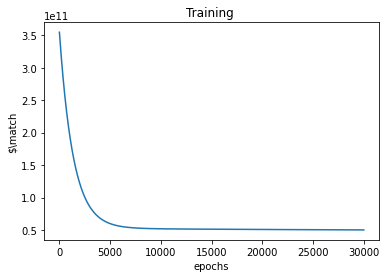

In [ ]:
myLireg.fit(X_train1,y_train1, epochs = 3e4,eta = 1e-5, show_curve = True)

In [ ]:
def R2(Y, Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [ ]:
y_hat_train = myLireg.predict(X_train1)

In [ ]:
R2(y_train1,y_hat_train)

0.02515760208349438

In [ ]:
y_hat_test = myLireg.predict(X_test1)

In [ ]:
R2(y_test1,y_hat_test)

0.1699112273766934

In [ ]:
X_t = np.array([[5,4, 5,5]])

In [ ]:
myLireg.predict(X_t)


array([1080695.46738759])

In [ ]:
d = data3.loc[data3['sold_price_per_sqrt_ft_range'] == 4]  
d 

,bedrooms,bathrooms,fireplaces,sold_price_per_sqrt_ft_range,sold_price
13,3,3.0,3,4,3000000
14,3,3.0,3,4,2600000
17,3,3.0,3,4,2600000
19,3,3.0,3,4,2600000
25,3,3.0,3,4,2600000
28,2,2.0,1,4,2500000
47,2,3.0,1,4,1800000


In [ ]:
data2['sold_price_per_sqrt_ft_range'].value_counts()

0    2516
1    2298
2      75
4       7
3       6
Name: sold_price_per_sqrt_ft_range, dtype: int64